#TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

##Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

##Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
* Text: The content of the blog post. Column name: Data
* Category: The category to which the blog post belongs. Column name: Labels


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##Tasks
###1. Data Exploration and Preprocessing
* Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
* Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
* Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [53]:
blogs = pd.read_csv('/content/blogs.csv')
blogs

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [54]:
blogs.info()
# There are 2000 entries with 2 columns
# Both of the columns are of 'object' dtype and with non-null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [55]:
blogs.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [56]:
blogs['Labels'].value_counts()
# There are total 20 Labels with 100 counts each

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


<Axes: xlabel='Labels'>

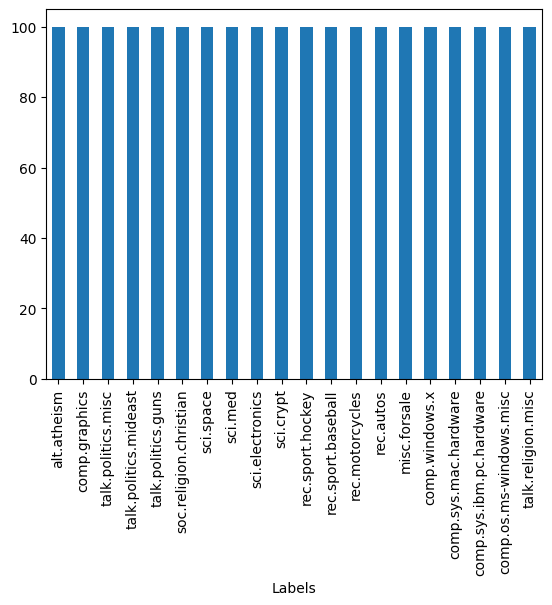

In [57]:
blogs['Labels'].value_counts().plot(kind='bar')

In [ ]:
print(blogs.iloc[3,0])
# A paragraph contains links, websites, unwanted texts, punctuation marks, URL, numbers, Uppercase characters, Newline characters, Quotes & Emojis
# For cleaning such a text, we need to perform some actions

Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!venice!batman.bmd.trw.com!jbrown
From: jbrown@batman.bmd.trw.com
Newsgroups: alt.atheism
Subject: Re: Death Penalty / Gulf War (long)
Message-ID: <1993Apr20.114137.883@batman.bmd.trw.com>
Date: 20 Apr 93 11:41:37 MST
References: <1993Apr13.060501.10561@leland.Stanford.EDU>  <930420.105805.0x8.rusnews.w165w@mantis.co.uk>
Lines: 346

In article <930420.105805.0x8.rusnews.w165w@mantis.co.uk>, mathew <mathew@mantis.co.uk> writes:
> jbrown@batman.bmd.trw.com writes:
>>In article <930419.115707.6f2.rusnews.w165w@mantis.co.uk>, mathew
>><mathew@mantis.co.uk> writes:
>>> Which "liberal news media" are we talking about?
>> 
>> Western news in general, but in particular the American "mass media":
>> CBS, NBC, ABC, etc.  The general tone of the news during the whole
>> war was one of "those poor, poor Iraqis" along with "look how precisely
>> this cruise miss

In [ ]:
blogs.iloc[3,0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!venice!batman.bmd.trw.com!jbrown\nFrom: jbrown@batman.bmd.trw.com\nNewsgroups: alt.atheism\nSubject: Re: Death Penalty / Gulf War (long)\nMessage-ID: <1993Apr20.114137.883@batman.bmd.trw.com>\nDate: 20 Apr 93 11:41:37 MST\nReferences: <1993Apr13.060501.10561@leland.Stanford.EDU>  <930420.105805.0x8.rusnews.w165w@mantis.co.uk>\nLines: 346\n\nIn article <930420.105805.0x8.rusnews.w165w@mantis.co.uk>, mathew <mathew@mantis.co.uk> writes:\n> jbrown@batman.bmd.trw.com writes:\n>>In article <930419.115707.6f2.rusnews.w165w@mantis.co.uk>, mathew\n>><mathew@mantis.co.uk> writes:\n>>> Which "liberal news media" are we talking about?\n>> \n>> Western news in general, but in particular the American "mass media":\n>> CBS, NBC, ABC, etc.  The general tone of the news during the whole\n>> war was one of "those poor, poor Iraqis" along with "look how precisely\n

In [58]:
import re

# It is seen that the main paragraph starts with the last occurence of the word 'writes:' or 'wrote:'
# So lets get the paragraph after these words

def get_text_after_last_occurrence(text):
    # Define the regular expression to match either 'writes:' or 'wrote:'
    pattern = r'(writes:\n|wrote:\n)\s*'

    # Find all matches and split on the last occurrence
    matches = list(re.finditer(pattern, text))

    if matches:
        # Get the position of the last match
        last_match_start = matches[-1].end()
        # Return the text starting from the last occurrence of 'writes:' or 'wrote:'
        return text[last_match_start:].strip()
    else:
        # If no occurrence found, return the whole text
        return text

In [60]:
import string

def remove_symbols_and_reduce_newlines(paragraph):
    cleaned_paragraph = re.sub(r'[^\w\s,.\n\\"]', '', paragraph)
    cleaned_paragraph = re.sub(r'--$', '', cleaned_paragraph, flags=re.MULTILINE)

    # Replace multiple newlines with a single newline
    cleaned_paragraph = re.sub(r'\n+', '\n', cleaned_paragraph).strip()

    return cleaned_paragraph

In [61]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [62]:
import re

# Function to clean the text
def clean_text(text):
    # Remove lines starting with non-content metadata (like From, Subject, etc.)
    cleaned_text = get_text_after_last_occurrence(text)
    # Remove email-like addresses
    cleaned_text = re.sub(r'\S+@\S+', '', cleaned_text)
    # Remove URLs or links
    cleaned_text = re.sub(r'\S+\.com\S*', '', cleaned_text)
    # Remove Emojis
    cleaned_text = deEmojify(cleaned_text)
    # Remove the symbols and reduce newlines
    cleaned_text = remove_symbols_and_reduce_newlines(cleaned_text)
    # Remove message IDs and non-paragraph metadata
    cleaned_text = re.sub(r'<[^>].>', '', cleaned_text)
    # Remove all the non-alpha symbols
    cleaned_text = re.sub(r'[^a-zA-Z]',' ',cleaned_text)
    # Replace multiple spaces with a single space
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Converting to the lowercase
    cleaned_text = cleaned_text.lower()

    return cleaned_text.strip()

In [63]:
# Apply the function for testing
cleaned_paragraph = clean_text(blogs.iloc[3,0])
print(cleaned_paragraph)

which liberal news media are we talking about western news in general but in particular the american mass media cbs nbc abc etc the general tone of the news during the whole war was one of those poor poor iraqis along with look how precisely this cruise missile blew this building to bits most odd over here there was very little about the suffering of the iraqi civilians until towards the end of the war and then it was confined to the few remaining quality newspapers true at first the news media seemed entranced by all the new gizmos the military was using not to mention the taped video transmissions from the missiles as they zeroed in on their targets but later and especially after the bunker full of civilians was hit they changed their tone it seemed to me that they didnt have the stomach for the reality of war that innocent people really do die and are maimed in warfare its like they were only progulfwar as long as it was nice and clean smart missiles dropping in on military hqs but 

In [65]:
blogs['Cleaned_data'] = blogs['Data'].apply(clean_text)
blogs

,Data,Labels,Cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,noting that a particular society in this case ...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,please enlighten me how is omnipotence contrad...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,p s im not sure about this but i think the cha...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,which liberal news media are we talking about ...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,evolution as i have said before is theory and ...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,presumably this means that some moral systems ...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,the fbi claims on the basis of their intellige...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,i will agree that creation should not be taugh...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,a lot of religious opinions and quotations fro...


In [66]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
blogs['tokens'] = blogs['Cleaned_data'].apply(tokenization)
blogs

,Data,Labels,Cleaned_data,tokens
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,noting that a particular society in this case ...,"[noting, that, a, particular, society, in, thi..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,please enlighten me how is omnipotence contrad...,"[please, enlighten, me, how, is, omnipotence, ..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,p s im not sure about this but i think the cha...,"[p, s, im, not, sure, about, this, but, i, thi..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,which liberal news media are we talking about ...,"[which, liberal, news, media, are, we, talking..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,evolution as i have said before is theory and ...,"[evolution, as, i, have, said, before, is, the..."
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,presumably this means that some moral systems ...,"[presumably, this, means, that, some, moral, s..."
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,the fbi claims on the basis of their intellige...,"[the, fbi, claims, on, the, basis, of, their, ..."
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,i will agree that creation should not be taugh...,"[i, will, agree, that, creation, should, not, ..."
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,a lot of religious opinions and quotations fro...,"[a, lot, of, religious, opinions, and, quotati..."


In [ ]:
print(blogs.iloc[3,3])

['which', 'liberal', 'news', 'media', 'are', 'we', 'talking', 'about', 'western', 'news', 'in', 'general', 'but', 'in', 'particular', 'the', 'american', 'mass', 'media', 'cbs', 'nbc', 'abc', 'etc', 'the', 'general', 'tone', 'of', 'the', 'news', 'during', 'the', 'whole', 'war', 'was', 'one', 'of', 'those', 'poor', 'poor', 'iraqis', 'along', 'with', 'look', 'how', 'precisely', 'this', 'cruise', 'missile', 'blew', 'this', 'building', 'to', 'bits', 'most', 'odd', 'over', 'here', 'there', 'was', 'very', 'little', 'about', 'the', 'suffering', 'of', 'the', 'iraqi', 'civilians', 'until', 'towards', 'the', 'end', 'of', 'the', 'war', 'and', 'then', 'it', 'was', 'confined', 'to', 'the', 'few', 'remaining', 'quality', 'newspapers', 'true', 'at', 'first', 'the', 'news', 'media', 'seemed', 'entranced', 'by', 'all', 'the', 'new', 'gizmos', 'the', 'military', 'was', 'using', 'not', 'to', 'mention', 'the', 'taped', 'video', 'transmissions', 'from', 'the', 'missiles', 'as', 'they', 'zeroed', 'in', 'on',

In [ ]:
print(len(blogs.iloc[3,3]))

2505


In [ ]:
'''def normalized_text(tokens):
    corpus = []
    for i in range(len(tokens)):
        txt = re.sub('[^a-zA-Z]',' ', tokens[i])
        corpus.append(txt)
    return corpus'''

In [ ]:
#blogs['corpus'] = blogs['tokens'].apply(normalized_text)
blogs

,Data,Labels,Cleaned_data,corpus
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,noting that a particular society in this case ...,"[noting, that, a, particular, society, in, thi..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,please enlighten me how is omnipotence contrad...,"[please, enlighten, me, how, is, omnipotence, ..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,p s im not sure about this but i think the cha...,"[p, s, im, not, sure, about, this, but, i, thi..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,which liberal news media are we talking about ...,"[which, liberal, news, media, are, we, talking..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,evolution as i have said before is theory and ...,"[evolution, as, i, have, said, before, is, the..."
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,presumably this means that some moral systems ...,"[presumably, this, means, that, some, moral, s..."
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,the fbi claims on the basis of their intellige...,"[the, fbi, claims, on, the, basis, of, their, ..."
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,i will agree that creation should not be taugh...,"[i, will, agree, that, creation, should, not, ..."
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,a lot of religious opinions and quotations fro...,"[a, lot, of, religious, opinions, and, quotati..."


In [ ]:
blogs.iloc[0,4]

['noting',
 'that',
 'a',
 'particular',
 'society',
 'in',
 'this',
 'case',
 'the',
 'mainland',
 'uk',
 'has',
 'few',
 'religously',
 'motivated',
 'murders',
 'and',
 'few',
 'murders',
 'of',
 'any',
 'kind',
 'says',
 'very',
 'little',
 'about',
 'whether',
 'interreligion',
 'murders',
 'elsewhere',
 'are',
 'religiously',
 'motivated',
 'no',
 'but',
 'it',
 'allows',
 'one',
 'to',
 'conclude',
 'that',
 'there',
 'is',
 'nothing',
 'inherent',
 'in',
 'all',
 'religion',
 'or',
 'for',
 'that',
 'matter',
 'in',
 'catholicism',
 'and',
 'protestantism',
 'that',
 'motivates',
 'one',
 'to',
 'kill',
 'motivates',
 'or',
 'allows',
 'the',
 'christian',
 'bible',
 'says',
 'that',
 'one',
 'may',
 'kill',
 'under',
 'certain',
 'circumstances',
 'in',
 'fact',
 'it',
 'instructs',
 'one',
 'to',
 'kill',
 'under',
 'certain',
 'circumstances',
 'id',
 'say',
 'the',
 'majority',
 'of',
 'people',
 'have',
 'a',
 'moral',
 'system',
 'that',
 'instructs',
 'them',
 'to',
 'ki

In [68]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()
def remove_stopwords_and_lemmatize(corpus):
    lemmatized = []
    for i in corpus:
        if i not in set(stopwords.words('english')):
            lemmatized.append(lemma.lemmatize(i))
    return lemmatized

In [69]:
remove_stopwords_and_lemmatize(blogs.iloc[0,3])

['noting',
 'particular',
 'society',
 'case',
 'mainland',
 'uk',
 'religously',
 'motivated',
 'murder',
 'murder',
 'kind',
 'say',
 'little',
 'whether',
 'interreligion',
 'murder',
 'elsewhere',
 'religiously',
 'motivated',
 'allows',
 'one',
 'conclude',
 'nothing',
 'inherent',
 'religion',
 'matter',
 'catholicism',
 'protestantism',
 'motivates',
 'one',
 'kill',
 'motivates',
 'allows',
 'christian',
 'bible',
 'say',
 'one',
 'may',
 'kill',
 'certain',
 'circumstance',
 'fact',
 'instructs',
 'one',
 'kill',
 'certain',
 'circumstance',
 'id',
 'say',
 'majority',
 'people',
 'moral',
 'system',
 'instructs',
 'kill',
 'certain',
 'circumstance',
 'get',
 'distinction',
 'motivate',
 'allow',
 'agree',
 'flavour',
 'theism',
 'allows',
 'atoricities',
 'thats',
 'indictment',
 'theism',
 'rather',
 'depends',
 'certain',
 'circumstance',
 'talk',
 'christianity',
 'islam',
 'least',
 'claim',
 'understood',
 'people',
 'go',
 'general',
 'statement',
 'theism',
 'fall',
 

In [70]:
blogs['corpus'] = blogs['tokens'].apply(remove_stopwords_and_lemmatize)
blogs

,Data,Labels,Cleaned_data,tokens,corpus
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,noting that a particular society in this case ...,"[noting, that, a, particular, society, in, thi...","[noting, particular, society, case, mainland, ..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,please enlighten me how is omnipotence contrad...,"[please, enlighten, me, how, is, omnipotence, ...","[please, enlighten, omnipotence, contradictory..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,p s im not sure about this but i think the cha...,"[p, s, im, not, sure, about, this, but, i, thi...","[p, im, sure, think, charge, shatim, also, app..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,which liberal news media are we talking about ...,"[which, liberal, news, media, are, we, talking...","[liberal, news, medium, talking, western, news..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,evolution as i have said before is theory and ...,"[evolution, as, i, have, said, before, is, the...","[evolution, said, theory, fact, exactly, amoun..."
...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,presumably this means that some moral systems ...,"[presumably, this, means, that, some, moral, s...","[presumably, mean, moral, system, better, othe..."
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,the fbi claims on the basis of their intellige...,"[the, fbi, claims, on, the, basis, of, their, ...","[fbi, claim, basis, intelligence, report, bd, ..."
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,i will agree that creation should not be taugh...,"[i, will, agree, that, creation, should, not, ...","[agree, creation, taught, science, macroevolut..."
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,a lot of religious opinions and quotations fro...,"[a, lot, of, religious, opinions, and, quotati...","[lot, religious, opinion, quotation, bible, ma..."


In [72]:
corpus = []

for i in range(len(blogs)):
    text = ' '.join(blogs.iloc[i,4])
    corpus.append(text)

corpus

['noting particular society case mainland uk religously motivated murder murder kind say little whether interreligion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates one kill motivates allows christian bible say one may kill certain circumstance fact instructs one kill certain circumstance id say majority people moral system instructs kill certain circumstance get distinction motivate allow agree flavour theism allows atoricities thats indictment theism rather depends certain circumstance talk christianity islam least claim understood people go general statement theism fall apart one could believe god instructs one utterly harmless part conclude something else required also happen believe something else work le well without religion easy themus religion supply easy themus necessarily love thy neighbour supply themus demolishes definition religion broader definition theism explained insisting even murder fou

In [ ]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


In [73]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(corpus)
x = pd.DataFrame(x.toarray(),columns = tf.get_feature_names_out())
x

,aa,aaa,aaaaarrrrgh,aalternate,aaltonen,aam,aan,aangegeven,aantal,aap,...,zwarte,zwyj,zwypvo,zx,zy,zyda,zyq,zyxel,zz,zzdqppntq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
y = blogs['Labels']
y

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


##2. Naive Bayes Model for Text Classification
* Split the data into training and test sets.
* Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
* Train the model on the training set and make predictions on the test set.


In [76]:
# Splitting the data into Training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [77]:
# Implementing a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)
ypred = nb.predict(X_test)
ypred

array(['comp.sys.mac.hardware', 'misc.forsale', 'sci.electronics',
       'sci.med', 'comp.graphics', 'sci.med', 'misc.forsale',
       'comp.sys.mac.hardware', 'sci.crypt', 'rec.motorcycles',
       'sci.space', 'sci.space', 'talk.politics.guns', 'sci.crypt',
       'comp.sys.mac.hardware', 'soc.religion.christian', 'misc.forsale',
       'talk.politics.misc', 'rec.motorcycles', 'sci.space',
       'comp.os.ms-windows.misc', 'talk.politics.misc',
       'talk.religion.misc', 'rec.motorcycles', 'misc.forsale',
       'comp.sys.ibm.pc.hardware', 'talk.politics.guns',
       'comp.os.ms-windows.misc', 'comp.windows.x',
       'comp.os.ms-windows.misc', 'soc.religion.christian',
       'rec.motorcycles', 'sci.crypt', 'rec.autos', 'comp.windows.x',
       'rec.autos', 'comp.graphics', 'alt.atheism', 'rec.motorcycles',
       'talk.politics.mideast', 'comp.os.ms-windows.misc',
       'comp.os.ms-windows.misc', 'sci.crypt', 'rec.sport.hockey',
       'rec.sport.hockey', 'talk.politics.guns',

In [106]:
unique, counts = np.unique(ypred, return_counts=True)
Y_pred_df_value_count = pd.DataFrame(list(zip(unique, counts)),
               columns =['Labels', 'Value Count'])
Y_pred_df_value_count

,Labels,Value Count
0,alt.atheism,18
1,comp.graphics,19
2,comp.os.ms-windows.misc,26
3,comp.sys.ibm.pc.hardware,20
4,comp.sys.mac.hardware,27
5,comp.windows.x,17
6,misc.forsale,31
7,rec.autos,16
8,rec.motorcycles,17
9,rec.sport.baseball,18


##3. Sentiment Analysis
* Choose a suitable library or method for performing sentiment analysis on the blog post texts.
* Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
* Examine the distribution of sentiments across different categories and summarize your findings.


In [87]:
# The text is more formal or lengthy so we should use Textblob
from textblob import TextBlob

import re

def clean_text_keep_punctuation(text):
    # Remove lines starting with non-content metadata (like From, Subject, etc.)
    text = get_text_after_last_occurrence(text)
    # Remove URLs and any pattern resembling a link
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove special symbols except basic punctuation (e.g., ., !, ?, ', ")
    text = re.sub(r'[^\w\s.,?!\'"]+', '', text)
    # Replace multiple newlines and spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip any leading/trailing whitespace
    text = text.strip()
    return text

def paragraph_level_sentiment(text):
    text = clean_text_keep_punctuation(text)
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [90]:
print(paragraph_level_sentiment(blogs.iloc[65,0]))

Positive


In [91]:
blogs['Sentiment'] = blogs['Data'].apply(paragraph_level_sentiment)
blogs

,Data,Labels,Cleaned_data,tokens,corpus,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,noting that a particular society in this case ...,"[noting, that, a, particular, society, in, thi...","[noting, particular, society, case, mainland, ...",Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,please enlighten me how is omnipotence contrad...,"[please, enlighten, me, how, is, omnipotence, ...","[please, enlighten, omnipotence, contradictory...",Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,p s im not sure about this but i think the cha...,"[p, s, im, not, sure, about, this, but, i, thi...","[p, im, sure, think, charge, shatim, also, app...",Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,which liberal news media are we talking about ...,"[which, liberal, news, media, are, we, talking...","[liberal, news, medium, talking, western, news...",Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,evolution as i have said before is theory and ...,"[evolution, as, i, have, said, before, is, the...","[evolution, said, theory, fact, exactly, amoun...",Positive
...,...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,presumably this means that some moral systems ...,"[presumably, this, means, that, some, moral, s...","[presumably, mean, moral, system, better, othe...",Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,the fbi claims on the basis of their intellige...,"[the, fbi, claims, on, the, basis, of, their, ...","[fbi, claim, basis, intelligence, report, bd, ...",Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,i will agree that creation should not be taugh...,"[i, will, agree, that, creation, should, not, ...","[agree, creation, taught, science, macroevolut...",Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,a lot of religious opinions and quotations fro...,"[a, lot, of, religious, opinions, and, quotati...","[lot, religious, opinion, quotation, bible, ma...",Positive


In [92]:
blogs['Sentiment'].value_counts()

,count
Sentiment,
Positive,1540
Negative,445
Neutral,15


<Axes: xlabel='Sentiment'>

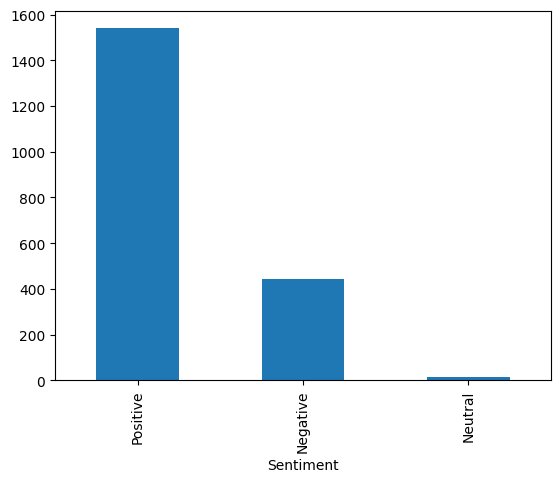

In [93]:
blogs['Sentiment'].value_counts().plot(kind='bar')

We can see that there are more positive paragraphs present in the blogs dataset, and moderate number of negative blogs with very less neutral blogs present.

##4. Evaluation
* Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
* Discuss the performance of the model and any challenges encountered during the classification process.
* Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred))
print('Training Accuracy: ', nb.score(X_train, Y_train)) # Train accuracy
print('Testing Accuracy: ', nb.score(X_test, Y_test)) # Test accuracy

                          precision    recall  f1-score   support

             alt.atheism       0.61      0.65      0.63        17
           comp.graphics       0.89      0.77      0.83        22
 comp.os.ms-windows.misc       0.81      1.00      0.89        21
comp.sys.ibm.pc.hardware       0.80      0.76      0.78        21
   comp.sys.mac.hardware       0.52      1.00      0.68        14
          comp.windows.x       1.00      0.77      0.87        22
            misc.forsale       0.52      0.76      0.62        21
               rec.autos       0.88      0.78      0.82        18
         rec.motorcycles       1.00      0.85      0.92        20
      rec.sport.baseball       1.00      0.95      0.97        19
        rec.sport.hockey       1.00      0.86      0.92        21
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       1.00      0.50      0.67        26
                 sci.med       0.79      1.00      0.88        15
         

In [105]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy Score: ', accuracy_score(Y_test, ypred))
print('Precision Score: ', precision_score(Y_test, ypred, average='weighted'))
print('Recall Score: ', recall_score(Y_test, ypred, average='weighted'))
print('f1-Score: ', f1_score(Y_test, ypred, average='weighted'))

Accuracy Score:  0.78
Precision Score:  0.8150491818506775
Recall Score:  0.78
f1-Score:  0.7810668853733204


### The overall model performance is about 78%, hence it is a generalized model. While classifying the model, the preprocessed data is mandatory for classification. Cleaning the data is more challenging for data Preprocessing. The given data is more complex to care of.
### In the sentiment analysis, there are more number of blogs with positive category. Positive sentiment often suggests that the posts are likely to engage readers in an uplifting or encouraging way. Such sentiment implications are like Audience engagement, creating content strategy for blogging, making the recommendation system on the basis of the sentiments, Identifying the trending topics for blogging.